In [1]:
# !pip install pandas
# !pip freeze > requirements.txt

In [136]:
import numpy as np
import pandas as pd

import re
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
!pip freeze > requirements.txt

In [34]:
df = pd.read_csv('p2-arbres-fr.csv', delimiter = ';')
# df

In [35]:
if 'type_emplacement' in df.columns:
    df.drop(columns=['type_emplacement', 'numero'], inplace=True)
    # debatable
    df = df.dropna(subset=['domanialite'])
    df.drop(columns=['complement_addresse'], inplace=True)
    df.remarquable = df.remarquable.apply(lambda x : 1 if x == 1 else 0)
    df.variete = df.variete.fillna('Manquante')
    df['variete'] = df['variete'].apply(lambda x: x[:-1] if x.endswith("'") else x)

    ### Filling values for each of genre, species and varietes when there is only one occurence of one of those in
    ### one of those categories.


    ## repeating the process three times in case one of




    # genre > espece
    for g in df.genre.value_counts().index:
        if df[['genre' , 'espece']][df['genre']== g]['espece'].nunique() == 1:
            df.loc[df['genre'] == g, 'espece'] = df.loc[df['genre'] == g, 'espece'].iloc[0]

    # espece > variete
    # espece > variete


In [38]:
df.variete.value_counts()

# #keeps 5th percentile of values
# filtered_df = df[df['genre'].map(df['genre'].value_counts()) > df['genre'].value_counts().quantile(0.8)]
# # df.isna().sum()
# filtered_df.genre.value_counts()

variete
Manquante             163359
Baumannii               4538
Briotii                 2827
Euchlora                2756
Chanticleer             2595
                       ...  
Ferox                      1
Schnee                     1
Wageningeri                1
Tristan                    1
Grosse Pomme Noire         1
Name: count, Length: 437, dtype: int64

In [7]:
df.nunique()

id                     200136
domanialite                 9
arrondissement             25
lieu                     6921
id_emplacement          69040
libelle_francais          192
genre                     175
espece                    539
variete                   437
circonference_cm          531
hauteur_m                 143
stade_developpement         4
remarquable                 2
geo_point_2d_a         200106
geo_point_2d_b         200113
dtype: int64

In [8]:
df.domanialite.value_counts()

domanialite
Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: count, dtype: int64

In [9]:
df.isna().sum()[df.isna().sum()!=0]

libelle_francais        1497
genre                     16
espece                  1751
stade_developpement    67205
dtype: int64

In [10]:
df.remarquable.value_counts()

remarquable
0    199952
1       184
Name: count, dtype: int64

In [11]:
df.shape[0] == df.espece.value_counts().sum()


False

In [12]:
df['espece'][df.variete == "Atropunicea'"].value_counts()

Series([], Name: count, dtype: int64)

In [13]:
df[df.espece=='hippocastanum'].stade_developpement.value_counts()

stade_developpement
A     9864
JA    2888
J     1709
M     1367
Name: count, dtype: int64

In [14]:
df.isna().sum()

id                         0
domanialite                0
arrondissement             0
lieu                       0
id_emplacement             0
libelle_francais        1497
genre                     16
espece                  1751
variete                    0
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
remarquable                0
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

In [15]:
df[df.variete != "Manquante"]

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
11,99885,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20001,Hêtre,Fagus,sylvatica,Atropunicea,30,0,NaN,0,48.858222,2.269287
25,99900,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20021,Hêtre,Fagus,sylvatica,Atropunicea,100,0,NaN,0,48.857849,2.267720
26,99901,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20022,Hêtre,Fagus,sylvatica,Atropunicea,35,0,NaN,0,48.857803,2.267476
27,99902,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20023,Hêtre,Fagus,sylvatica,Atropunicea,185,0,NaN,0,48.857809,2.267599
28,99903,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20024,Hêtre,Fagus,sylvatica,Atropunicea,130,0,NaN,0,48.857790,2.267713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198835,2023213,DJS,PARIS 19E ARRDT,CENTRE SPORTIF JULES LADOUMEGUE / 35 ROUTE DES...,109002,Saule,Salix,babylonica,Tortuosa,20,5,NaN,0,48.890661,2.397392
198866,2023360,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402001,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863689,2.348325
198867,2023361,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402002,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863716,2.348449
198868,2023362,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402003,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863744,2.348573


In [16]:
np.round(df.genre.value_counts().sum())/10

20012.0

In [17]:
df.genre.value_counts().mean()

1143.5428571428572

In [18]:
# <ods-dataset-context context="lesarbresplantes" lesarbresplantes-dataset="les-arbres-plantes" lesarbresplantes-parameters="{'geofilter.polygon':'(48.88639177703194,2.228851318359375),(48.812289858662574,2.230224609375),(48.7874140472094,2.349700927734375),(48.82268881260476,2.4863433837890625),(48.94054322456003,2.4217987060546875),(48.88639177703194,2.228851318359375)'}">
#     <ods-map no-refit="true" scroll-wheel-zoom="false" display-control="true" search-box="true" toolbar-fullscreen="true" toolbar-geolocation="true" basemap="jawg.streets" location="13,48.89886,2.34249">
#         <ods-map-layer-group>
#             <ods-map-layer context="lesarbresplantes" color="#C32D1C" picto="ods-circle" show-marker="true" display="auto" shape-opacity="0.5" point-opacity="1" border-color="#FFFFFF" border-opacity="1" border-size="1" border-pattern="solid" caption="true" title="Les arbres plantés" description="Jeu de données géographique
#     présentant les arbres plantés (hors peuplement forestiers)" size="4" size-min="3" size-max="5" size-function="linear"></ods-map-layer>
#         </ods-map-layer-group>
#     </ods-map>

# </ods-dataset-context>

In [19]:
df['variete'].dropna().apply(lambda x: isinstance(x, float)).value_counts()


variete
False    200136
Name: count, dtype: int64

In [20]:
df.genre.value_counts()[df.genre.value_counts()<3].count()

40

In [21]:
df[['genre' , 'espece']][df['genre']=='Taxus'].value_counts()

genre  espece          
Taxus  baccata             1991
       n. sp.                 7
       alba                   4
       x media                2
       baccata f. Aurea       1
Name: count, dtype: int64

In [22]:
df.espece.value_counts()

espece
x hispanica                  36409
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: count, Length: 539, dtype: int64

In [23]:
df[['genre' , 'espece']][df['genre']=='Taxus']['espece'].value_counts()

espece
baccata             1991
n. sp.                 7
alba                   4
x media                2
baccata f. Aurea       1
Name: count, dtype: int64

In [24]:
df.espece.value_counts().index

Index(['x hispanica', 'hippocastanum', 'japonica', 'n. sp.', 'tomentosa',
       'pseudoplatanus', 'platanoides', 'nigra', 'x europaea', 'x carnea',
       ...
       'x chinensis', 'minor var. vulgaris', 'x macrantha', 'acerifolius',
       'horizontalis', 'polycarpa', 'x gondouinii', 'lusitanica subsp.azorica',
       'oliveri', 'delavayi subsp. potaninii'],
      dtype='object', name='espece', length=539)

In [25]:
df[df.genre == 'Liriodendron'].genre.value_counts()

genre
Liriodendron    1129
Name: count, dtype: int64

In [26]:
g

'Washingtonia'

In [28]:
# df.espece = df.espece.apply(lambda x : df.genre[df.genre == g].value_counts().index[0])

In [29]:
df

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Manquante,20,5,NaN,0,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,Manquante,65,8,A,0,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,Manquante,90,10,A,0,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,Manquante,60,8,A,0,48.857722,2.321006
4,99878,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,Manquante,38,0,NaN,0,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,Manquante,0,0,NaN,0,48.821957,2.456264
200133,2024742,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,Manquante,0,0,NaN,0,48.823254,2.457935
200134,2024743,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,Manquante,0,0,NaN,0,48.822907,2.457970
200135,2024744,Jardin,BOIS DE VINCENNES,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,Manquante,0,0,NaN,0,48.822522,2.455956


In [143]:
def extract_location_ml(location):
    stopwords = set(['DU', 'DE', 'DES', 'LE', 'LA', 'LES', 'UN', 'UNE', 'ET', 'CS', 'D', 'L', 'ST', 'PTE'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(1)
    if most_common_word:
        return most_common_word[0][0]
df['type_de_lieu'] = df['lieu'].apply(extract_location_ml)

lieux_fréquents_df = df.type_de_lieu.value_counts().reset_index().rename(columns={'count': 'compteur'})
lieux_fréquents_df.head(16)

,type_de_lieu,compteur
0,CIMETIERE,31861
1,AVENUE,30814
2,RUE,28826
3,BOULEVARD,23736
4,PARC,14749
5,SQUARE,13040
6,JARDIN,9153
7,PLACE,7606
8,TALUS,5384
9,ROUTE,4544


On vérifie que chaque colonne du DaTaframe à bien été intégré à la démarche

In [146]:
lieux_fréquents_df.compteur.sum() == df.shape[0]

True

Testé avec plusieurs exemples et vérifications des 100 valeurs les plus communes

In [147]:
'RUES' in lieux_fréquents_df.type_de_lieu.to_list()

False

On a bien vérifier que Counter ignore naturellement les mots au pluriel, on ne retrouve pas dans les valeurs à la fois RUE et RUES par exemple.

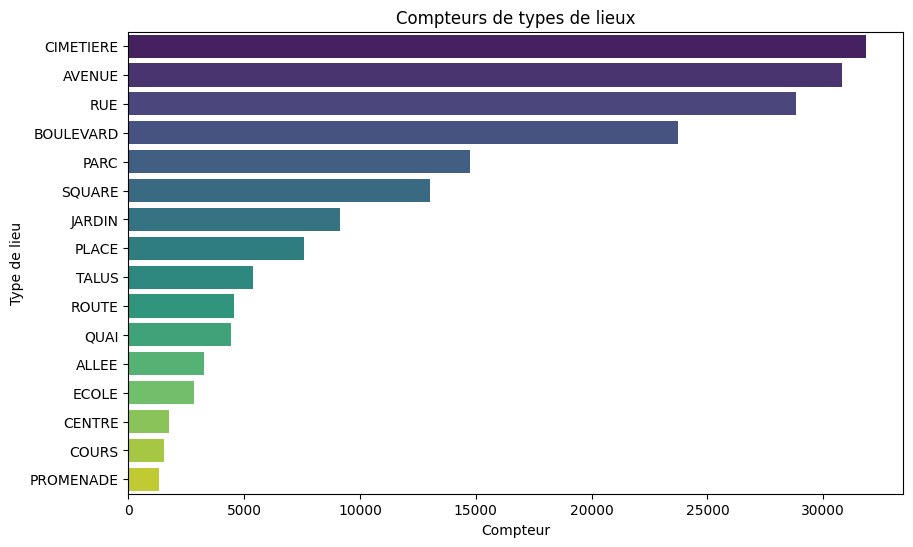

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='compteur', y='type_de_lieu', data=lieux_fréquents_df.head(16), palette='viridis', hue='type_de_lieu')
plt.xlabel('Compteur')
plt.ylabel('Type de lieu')
plt.title('Compteurs de types de lieux')
plt.show()

Chaque genre d'arbre va avoir un espace vert de prédilection, on met à disposition des équipes un dictionnaire indiquant la domanialite dans laquelle elle est le plus présente.



/tmp/ipykernel_3833/2647854254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dom_per_genre.index, y=top_dom_per_genre.values, palette='icefire')


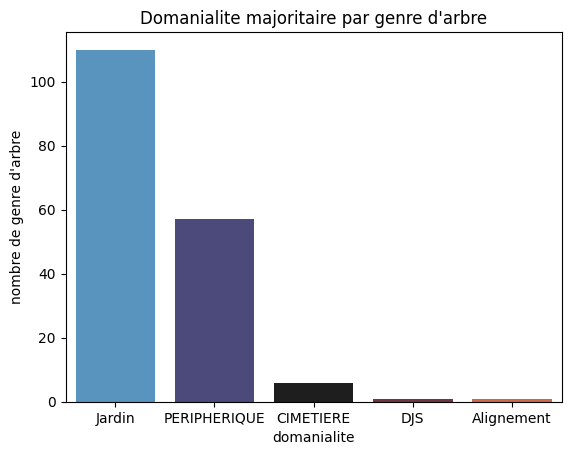

In [150]:
max_values_dict = {genre: max_value for genre, max_value in df.groupby('genre')['domanialite'].max().items()}
top_dom_per_genre = pd.DataFrame(max_values_dict.items(), columns = ['genre', 'domanialite']).domanialite.value_counts()
sns.barplot(x=top_dom_per_genre.index, y=top_dom_per_genre.values, palette='icefire')
plt.title("Domanialite majoritaire par genre d'arbre")
plt.ylabel("nombre de genre d'arbre")
plt.show()

2. ***Pistes à suivre***

In [ ]:
# df.id_emplacement.value_counts()
# Creuser 'Manquante'


4. ***DUMP***

In [ ]:
for g in df.genre.value_counts().index:
    if df[['genre' , 'espece']][df['genre']== g]['espece'].nunique() == 1:
        df.loc[df['genre'] == g, 'espece'] = df.loc[df['genre'] == g, 'espece'].iloc[0]
#         df.espece = df.espece.apply(lambda x : df.genre[df.genre == g].value_counts()[0])


# fonctionne mais ne retire qu'une espece

In [151]:
def extract_location_ml(location):
    stopwords = set(['DU', 'DE', 'DES', 'LE', 'LA', 'LES', 'UN', 'UNE', 'ET', 'CS', 'D', 'L', 'ST', 'PTE'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(1)
    if most_common_word:
        return most_common_word[0][0]
df['type_de_lieu'] = df['lieu'].apply(extract_location_ml)

lieux_fréquents_df = df.type_de_lieu.value_counts().reset_index().rename(\
                            columns={'index': 'type_de_lieu', 'type_de_lieu':"nombre_d'arbres"})
lieux_fréquents_df.head(16)

,nombre_d'arbres,count
0,CIMETIERE,31861
1,AVENUE,30814
2,RUE,28826
3,BOULEVARD,23736
4,PARC,14749
5,SQUARE,13040
6,JARDIN,9153
7,PLACE,7606
8,TALUS,5384
9,ROUTE,4544
